- importing the ibraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import os,sys
import warnings
warnings.filterwarnings("ignore")

- Loading the dataset

In [48]:
df = pd.read_csv("Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df.shape

(1470, 35)

In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- Basic info

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [52]:
num_columns = df.select_dtypes(include=["int64"]).columns
cat_columns = df.select_dtypes(include=["object"]).columns
print("Categorical_columns are = ",cat_columns)
print()
print("=*"*70)
print("=*"*70)
print()
print("Numerical_columns are = ",num_columns)

Categorical_columns are =  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*

Numerical_columns are =  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'Yea

- Checking Null Values

In [53]:
df.isnull().sum().sum()

0

- Statistical Measures

In [54]:
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [55]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [56]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

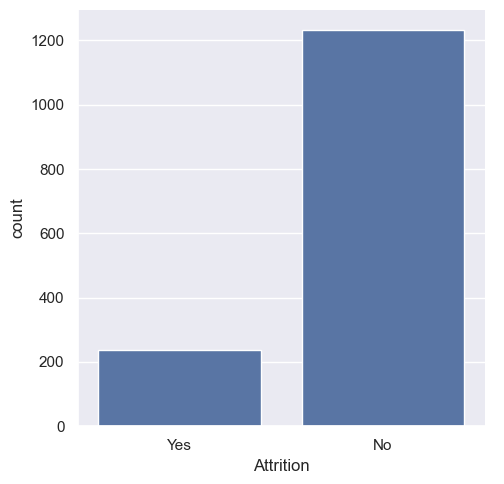

In [57]:
ax=sns.catplot(x="Attrition",data=df,kind="count") # by this we can undeerstand that data is highly imbalenced

In [58]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [59]:
df["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

<Axes: xlabel='BusinessTravel', ylabel='count'>

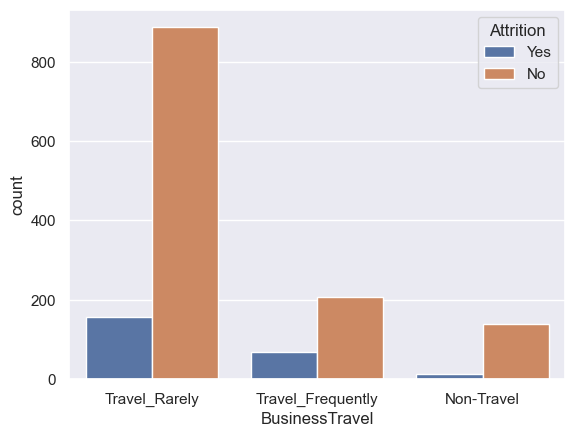

In [60]:
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")

In [61]:
df["Gender"].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

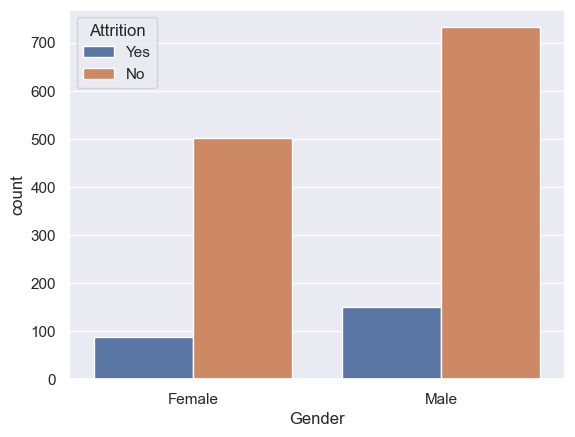

In [62]:
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

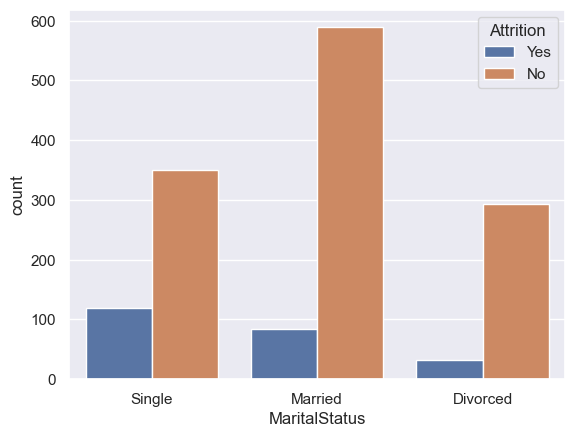

In [63]:
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")

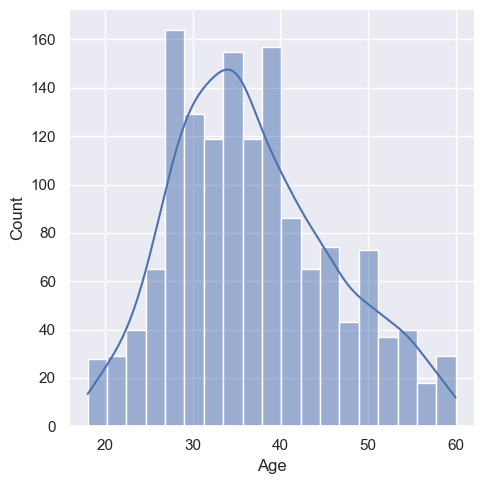

In [64]:
sns.displot(df["Age"],kde=True)

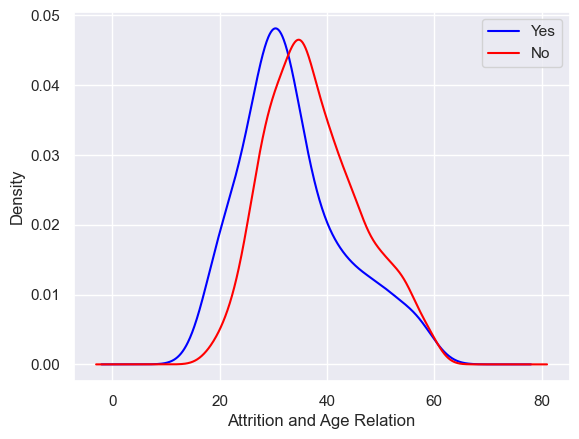

In [65]:
df[df["Attrition"]=="Yes"]["Age"].plot(kind='kde',color="blue",label="Yes")
df[df["Attrition"]=="No"]["Age"].plot(kind="kde",color="red",label="No")
plt.xlabel("Attrition and Age Relation")
plt.legend()

In [66]:
depart = pd.crosstab(df["Attrition"],df['Department']).T
depart["Total"] = depart["No"]+depart["Yes"]
depart["Yes_Percent"] = depart["Yes"]/depart["Total"]*100
depart["No_percent"]  = depart["No"]/depart["Total"]*100
depart

Attrition,No,Yes,Total,Yes_Percent,No_percent
Department,,,,,
Human Resources,51,12,63,19.047619,80.952381
Research & Development,828,133,961,13.839750,86.160250
Sales,354,92,446,20.627803,79.372197


<Axes: ylabel='Department'>

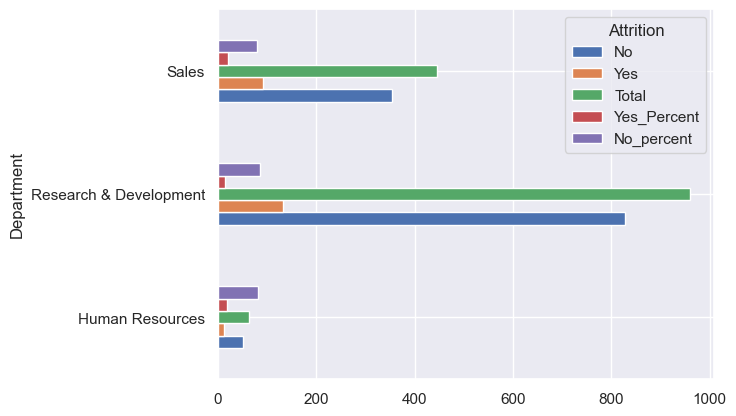

In [67]:
depart.plot(kind="barh")

<Axes: xlabel='Age'>

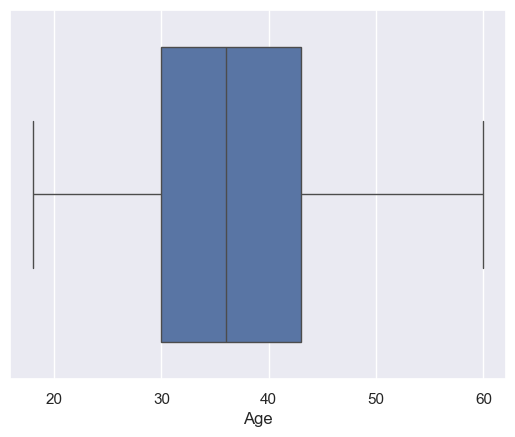

In [68]:
# for i in num_columns:
#     sns.boxplot(x=i,data=df)
    
sns.boxplot(x="Age",data=df)

- Encoding the categorical coolumns

In [69]:
cat_columns 

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
lab = LabelEncoder()
df["Attrition"] = lab.fit_transform(df["Attrition"])
df["BusinessTravel"]=lab.fit_transform(df["BusinessTravel"])
df["Department"]=lab.fit_transform(df["Department"])
df["EducationField"]=lab.fit_transform(df["EducationField"])
df["Gender"]=lab.fit_transform(df["Gender"])
df["Gender"]=lab.fit_transform(df["Gender"])
df["JobRole"]=lab.fit_transform(df["JobRole"])
df["MaritalStatus"]=lab.fit_transform(df["MaritalStatus"])
df["Over18"]=lab.fit_transform(df["Over18"])
df["OverTime"]=lab.fit_transform(df["OverTime"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


- Dealing with Imbalance Data

In [72]:
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

- Splitting the data

In [73]:
x=df.drop("Attrition",axis=1)
y=df.Attrition

In [95]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 10,test_size=0.3) # we can also use Stratify here to work with imbalanced data (it just tries to include the no of featurrees into the training set is balanced witho out selecting only one class while when there is imbalanced data)

- Scaling the training Data

In [76]:
num_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [93]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
df[num_columns]=ssc.fit_transform(df[num_columns])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


- # Smote(Synthatic Minority Oversamplinng Technique) is a technique which helps to work when the data is highly imbalanced (creates an synthetic values for minority class insted of genrating the duplicate rows it uses nearest neighbour approch to genrate these rows to make a balanced data) we are doing this because most of the ml models work on the principle of majority approch where this cauuse an minority class to not work properly and decrease the acuuracy of model and performance

In [78]:
from imblearn.over_sampling import SMOTE 

In [79]:
smote = SMOTE(random_state=10)
xtrain_smote,ytrain_smote = smote.fit_resample(xtrain,ytrain)

- Hyper parameter Tuning

- Grid Search CV

In [80]:
 n_estimators=[100,200,300,400,500,600,800,1000]
criterion=['gini','entropy']
max_depth=[5,10,15,20,25,30]
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.0,
# max_features='sqrt',
# max_leaf_nodes=None,
# min_impurity_decrease=0.0,
# bootstrap=True,
# oob_score=False,
# n_jobs=None,
# random_state=None,
# verbose=0,
# warm_start=False,
# class_weight=None,
# ccp_alpha=0.0,
# max_samples=None,

In [81]:
hyper_parameter = dict(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [83]:
grid_search = GridSearchCV(rf,hyper_parameter,cv=5, verbose=1, n_jobs=-1)

- Finally Fitting in the model

In [84]:
model = grid_search.fit(xtrain_smote,ytrain_smote)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [85]:
ytest_pred = model.predict(xtest)

In [86]:
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 25, 'n_estimators': 600}


 - Evaluating through Metrix

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [88]:
confusion_matrix(ytest,ytest_pred)

array([[337,  20],
       [ 56,  28]], dtype=int64)

In [89]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       357
           1       0.58      0.33      0.42        84

    accuracy                           0.83       441
   macro avg       0.72      0.64      0.66       441
weighted avg       0.81      0.83      0.81       441



In [90]:
print(accuracy_score(ytest,ytest_pred))

0.8276643990929705


- The Accuracy Score of our model is too good that it is 80%

In [91]:
import pickle

In [92]:
with open("Hr_model.pkl","wb") as fh:
    pickle.dump(model,fh)